<a href="https://colab.research.google.com/github/Muditshrivastav/Ai-ml/blob/main/AI_for_medical_imagening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [ ]:
import zipfile

with zipfile.ZipFile("/content/archive (8).zip", 'r') as zip_ref:
    zip_ref.extractall("/content/archive (8)")


In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 16

train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    "/content/archive (8)/brain_tumor_dataset",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    "/content/archive (8)/brain_tumor_dataset",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(IMG_SIZE, IMG_SIZE, 3)))
base_model.trainable = False  # Freeze the base model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

<ipython-input-5-1133e97ffe40>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(IMG_SIZE, IMG_SIZE, 3)))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.3912 - loss: 1.1629 - val_accuracy: 0.6600 - val_loss: 0.6916
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6151 - loss: 0.8256 - val_accuracy: 0.6400 - val_loss: 0.5894
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5398 - loss: 0.8949 - val_accuracy: 0.8000 - val_loss: 0.4232
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.6089 - loss: 0.7704 - val_accuracy: 0.8200 - val_loss: 0.3879
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.6847 - loss: 0.6134 - val_accuracy: 0.8400 - val_loss: 0.3442
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7208 - loss: 0.5775 - val_accuracy: 0.8600 - val_loss: 0.3107
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6860 - loss: 0.5818 - val_accuracy: 0.9200 - val_loss: 0.3233
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7572 - loss: 0.5570 - val_accuracy: 0.8400 - val_loss: 0.2995
Epo

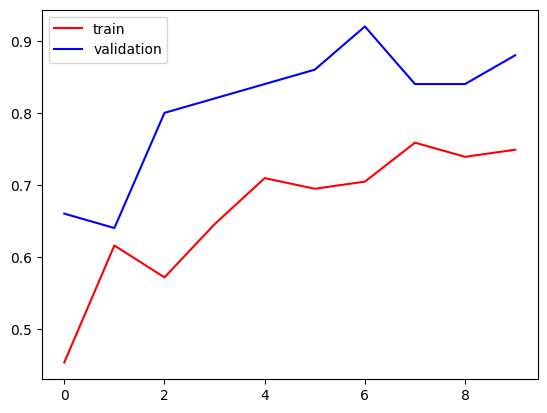

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

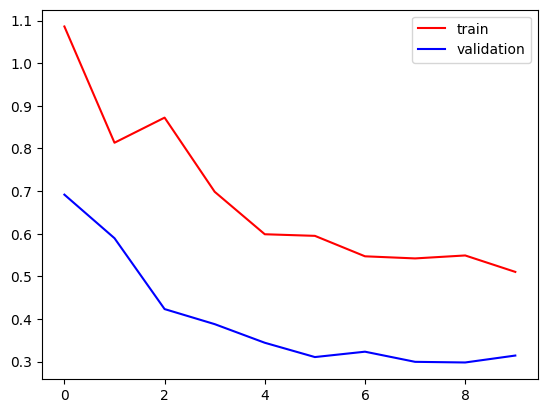

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model.save('brain_tumor_detection.keras')

In [ ]:
val_loss, val_accuracy = model.evaluate(val_gen)
print("val_Accuracy:", val_accuracy)



4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 444ms/step - accuracy: 0.9569 - loss: 0.3113
val_Accuracy: 0.9599999785423279


In [ ]:
# Example input for a single image
# Example input for a single image
from PIL import Image
import numpy as np

# Load the image using Image.open
image = Image.open('/content/archive (8)/brain_tumor_dataset/yes/Y1.jpg') # Replace with your image path
image = image.resize((IMG_SIZE, IMG_SIZE)) # Resize to match model input
x_input = np.array(image) # Convert PIL Image to NumPy array
x_input = np.expand_dims(x_input, axis=0)  # shape should be (1, 224, 224, 3)
x_input = tf.keras.applications.mobilenet_v2.preprocess_input(x_input) # Preprocess the image using the same method as training data

from tensorflow.keras.models import load_model
model = load_model('/content/brain_tumor_detection.keras')  # or .keras

preds = model.predict(x_input)

# Assuming your model has two classes: 0 for "no tumor" and 1 for "tumor"
predicted_class = np.argmax(preds[0])  # Get the index of the class with the highest probability

if predicted_class == 0:
    print("You don't have a brain tumor")
else:
    print("You have a brain tumor")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
You have a brain tumor
